http://www.fbs.osaka-u.ac.jp/labs/skondo/ozaki/what%20is%20RD%203%20explanation%20for%20high%20school%20mathematics.htm


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## 3.1 

In [17]:
def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))


t = np.linspace(0, 20, num=100)
S = step_function(t)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [73]:
# Parameters
k_S = 1
k_IR = 1
k_RR = 10
k_RI = 1
gamma_R = 1
gamma_I = 1

K = 4
m = 2

# Range of Phase space
max_R = 15
min_R = -1
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = 0
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)


def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))


t = 0  # np.linspace(0, 20, num=100)
S = step_function(t)

dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
dI = k_IR * R - gamma_I * I

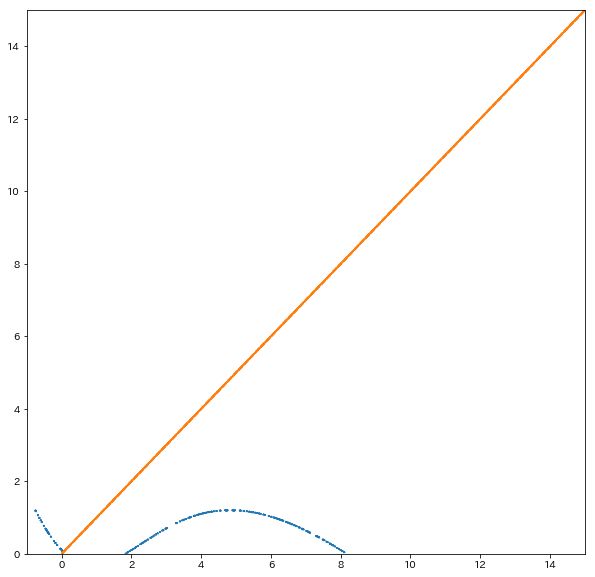

In [74]:
plt.figure(figsize=(10, 10))
plt.title('')
#plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[1]])
#plt.plot(trajectory[:,0], trajectory[:,1], color="red")

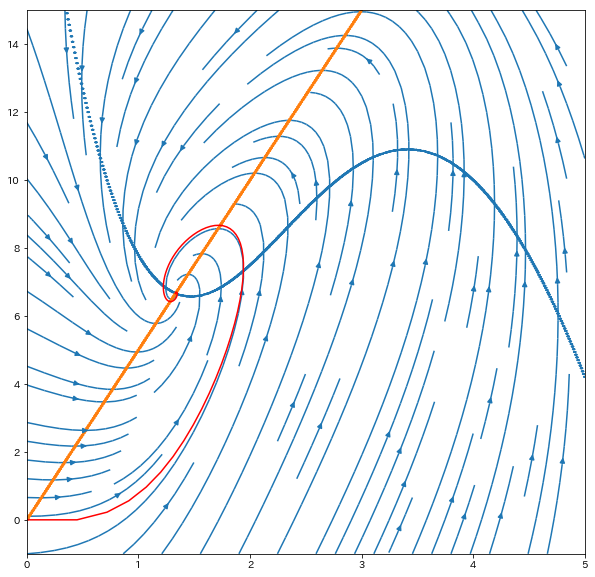

In [122]:
# Parameters
k_S = 45
k_IR = 5
k_RR = 35
k_RI = 0.2
gamma_R = 5
gamma_I = 1

K = 4
m = 2

# Range of Phase space
max_R = 5
min_R = -0
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = -1
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)


def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))


# t = 0 #np.linspace(0, 20, num=100)
S = 0.1  # step_function(t)

dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
dI = k_IR * R - gamma_I * I


def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
    dI = k_IR * R - gamma_I * I
    return dR, dI


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory


R_0, I_0 = 0, 0
trajectory = calculate_trajectory(R_0, I_0,
                                  differential=calculate_differential,
                                  delta=0.1, steps=1000)


plt.figure(figsize=(10, 10))
plt.title('')
plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red")

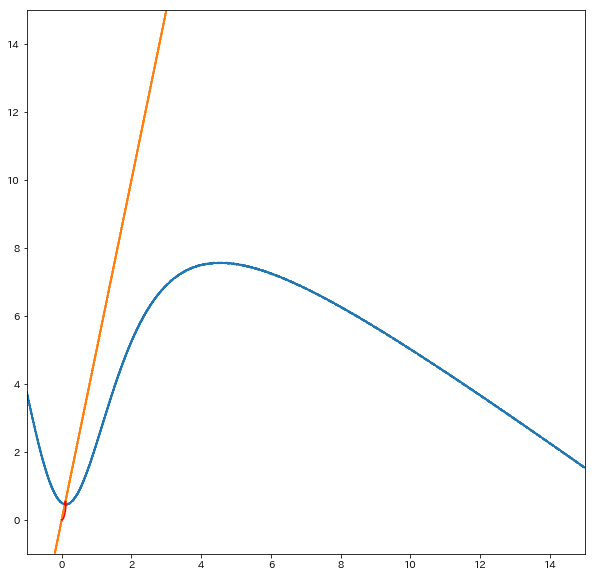

In [166]:
# Parameters
k_S = 0.1
k_IR = 5
k_RR = 2.5
k_RI = 0.2
gamma_R = 0.15
gamma_I = 1

K = 2
m = 2

# Range of Phase space
max_R = 15
min_R = -1
R_width = 0.01
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 15
min_I = -1
I_width = 0.01
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)


def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))


# t = 0 #np.linspace(0, 20, num=100)
S = 1  # step_function(t)

dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
dI = k_IR * R - gamma_I * I


def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
    dI = k_IR * R - gamma_I * I
    return dR, dI


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory


R_0, I_0 = 0, 0
trajectory = calculate_trajectory(R_0, I_0,
                                  differential=calculate_differential,
                                  delta=0.1, steps=1000)


plt.figure(figsize=(10, 10))
plt.title('')
#plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red")

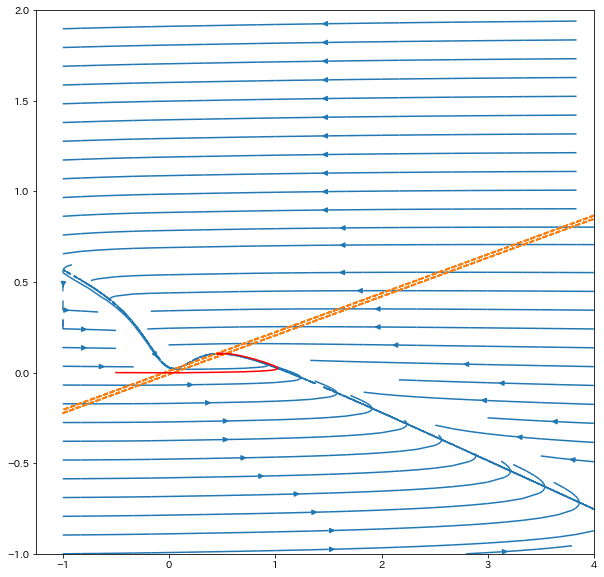

In [176]:
# Parameters
k_S = 0.1
k_IR = 0.0236
k_RR = 3.16
k_RI = 10.65
gamma_R = 2.87
gamma_I = 0.11

K = 0.32
m = 2

# Range of Phase space
max_R = 4
min_R = -1
R_width = 0.001
R = np.arange(min_R, max_R + R_width, R_width)
max_I = 2
min_I = -1
I_width = 0.001
I = np.arange(min_I, max_I + I_width, I_width)
R, I = np.meshgrid(R, I)


def step_function(t):
    return 0.1 * 10 ** ((5 <= t) & (t <= 15))


# t = 0 #np.linspace(0, 20, num=100)
S = 3  # step_function(t)

dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
dI = k_IR * R - gamma_I * I


def calculate_differential(R, I):
    dR = k_S * S - gamma_R * R + k_RR * (R**m / (K**m + R**m)) - k_RI * I
    dI = k_IR * R - gamma_I * I
    return dR, dI


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(1000):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory


R_0, I_0 = -0.5, 0
trajectory = calculate_trajectory(R_0, I_0,
                                  differential=calculate_differential,
                                  delta=0.1, steps=1000)


plt.figure(figsize=(10, 10))
plt.title('')
plt.streamplot(R, I, dR, dI)
plt.contour(R, I, np.isclose(dR, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(R, I, np.isclose(dI, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red")

In [177]:
trajectory

array([[-0.5       ,  0.        ],
       [-0.10232293, -0.00118   ],
       [-0.01238693, -0.0014085 ],
       ...,
       [ 0.48560887,  0.10418479],
       [ 0.48560855,  0.10418479],
       [ 0.48560822,  0.1041848 ]])

## 例題3.1

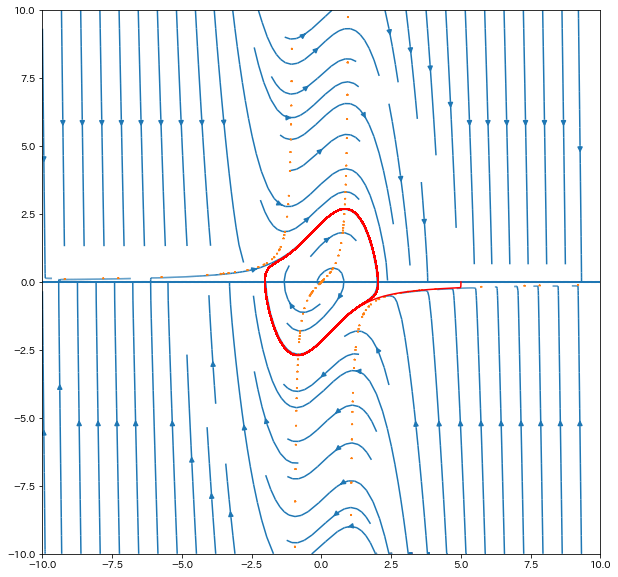

In [231]:
# Parameters
mu = 1

# Range of Phase space
max_V = 10
min_V = -10
V_width = 0.01
V = np.arange(min_V, max_V + V_width, V_width)
max_m = 10
min_m = -10
m_width = 0.01
m = np.arange(min_m, max_m + m_width, m_width)
V, m = np.meshgrid(V, m)

dV = m
dm = mu * (1 - V ** 2) * m - V


def calculate_differential(V, m):
    dV = m
    dm = mu * (1 - V ** 2) * m - V
    return dV, dm


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=100):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(steps):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1
    return ｔrajectory


V_0, m_0 = 5, 0
trajectory = calculate_trajectory(V_0, m_0,
                                  differential=calculate_differential,
                                  delta=0.01, steps=100000)

plt.figure(figsize=(10, 10))
plt.title('')
plt.streamplot(V, m, dV, dm)
plt.contour(V, m, np.isclose(dV, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[0]])
plt.contour(V, m, np.isclose(dm, 0.0, atol=1e-3),
            linestyles=["dashed"], colors=[sns.color_palette()[1]])
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red")

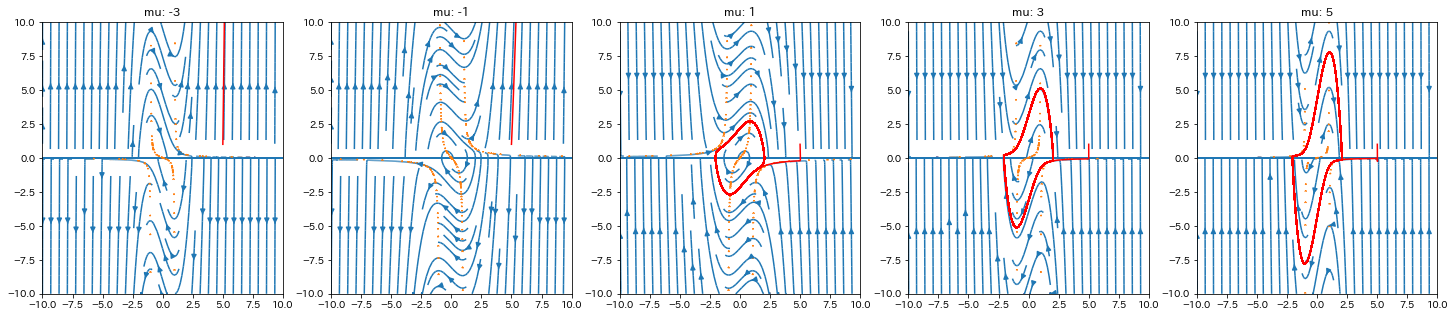

In [244]:

# Range of Phase space
max_V = 10
min_V = -10
V_width = 0.01
V = np.arange(min_V, max_V + V_width, V_width)
max_m = 10
min_m = -10
m_width = 0.01
m = np.arange(min_m, max_m + m_width, m_width)
V, m = np.meshgrid(V, m)


# Parameters
mus = [-3, -1, 1, 3, 5]
fig = plt.figure(figsize=(len(mus) * 5, len(mus) * 1))

for i, mu in enumerate(mus):
    dV = m
    dm = mu * (1 - V ** 2) * m - V

    def calculate_differential(V, m):
        dV = m
        dm = mu * (1 - V ** 2) * m - V
        return dV, dm

    def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=100):
        ｔrajectory = np.array([[x_0, y_0]])
        x_i, y_i = x_0, y_0
        for _ in range(steps):
            dx, dy = differential(x_i, y_i)
            x_ip1 = x_i + delta * dx
            y_ip1 = y_i + delta * dy
            #ｔrajectory.append([x_ip1, y_ip1])
            ｔrajectory = np.append(
                ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
            x_i, y_i = x_ip1, y_ip1

            if (abs(x_i) > 1e4) | (abs(y_i) > 1e4):
                break
        return ｔrajectory

    V_0, m_0 = 5, 1
    trajectory = calculate_trajectory(V_0, m_0,
                                      differential=calculate_differential,
                                      delta=0.01, steps=100000)

    ax = fig.add_subplot(1, len(mus), i+1)
    ax.set_title(f"mu: {mu}")
    ax.streamplot(V, m, dV, dm)
    ax.contour(V, m, np.isclose(dV, 0.0, atol=1e-3),
               linestyles=["dashed"], colors=[sns.color_palette()[0]])
    ax.contour(V, m, np.isclose(dm, 0.0, atol=1e-3),
               linestyles=["dashed"], colors=[sns.color_palette()[1]])
    ax.plot(trajectory[:, 0], trajectory[:, 1], color="red")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

In [192]:
trajectory.shape

(1001, 2)

## 例題 3.2

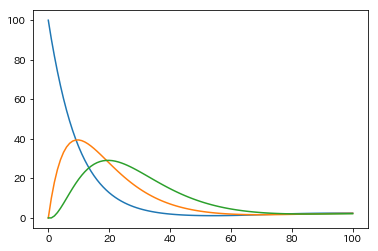

In [272]:
n = 1
V = 10
K = 2

a = 1
b = 1
c = 1
d = 1
e = 1

X_0 = 100
Y_0 = 0
Z_0 = 0

time_steps = 100
delta = 0.1

trajX = [X_0]
trajY = [Y_0]
trajZ = [Z_0]
X = X_0
Y = Y_0
Z = Z_0

for _ in range(time_steps):
    dX = V / (K ** n + Z ** n) - a * X
    dY = b * X - c * Y
    dZ = d * Y - e * Z

    X += dX * delta
    Y += dY * delta
    Z += dZ * delta

    trajX.append(X)
    trajY.append(Y)
    trajZ.append(Z)

plt.plot(np.arange(time_steps + 1), trajX)
plt.plot(np.arange(time_steps + 1), trajY)
plt.plot(np.arange(time_steps + 1), trajZ)

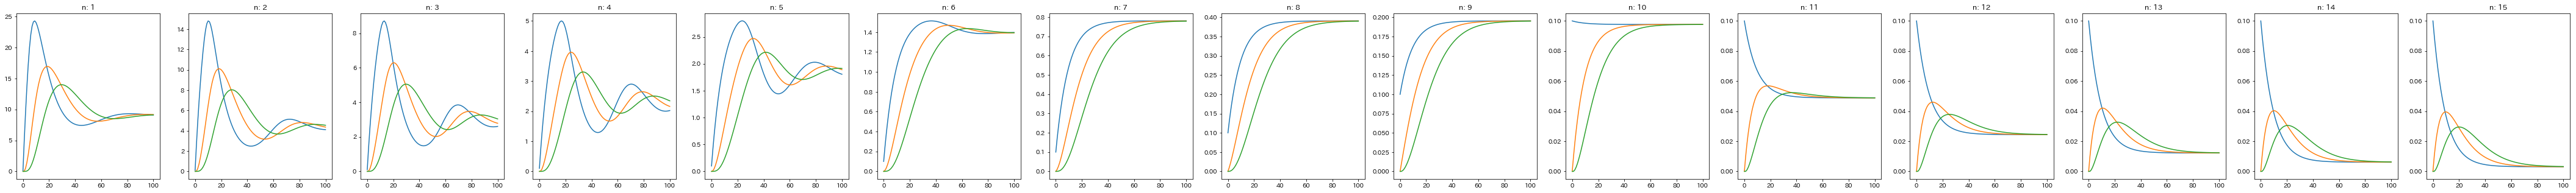

In [281]:
max_n = 15
step = 1
fig = plt.figure(figsize=(max_n // step * 5, 5))

for i, n in enumerate(range(1, max_n + 1, step)):
    V = 100
    K = 2

    a = 1
    b = 1
    c = 1
    d = 1
    e = 1

    X_0 = 0.1
    Y_0 = 0
    Z_0 = 0

    time_steps = 100
    delta = 0.1

    trajX = [X_0]
    trajY = [Y_0]
    trajZ = [Z_0]
    X = X_0
    Y = Y_0
    Z = Z_0

    for _ in range(time_steps):
        dX = V / (K**n + Z**n) - a * X
        dY = b * X - c * Y
        dZ = d * Y - e * Z

        X += dX * delta
        Y += dY * delta
        Z += dZ * delta

        trajX.append(X)
        trajY.append(Y)
        trajZ.append(Z)

    ax = fig.add_subplot(1, max_n // step, i+1)
    ax.set_title(f"n: {n}")

    ax.plot(np.arange(time_steps + 1), trajX)
    ax.plot(np.arange(time_steps + 1), trajY)
    ax.plot(np.arange(time_steps + 1), trajZ)

## 例題 3.2

In [288]:
n = 1
m = 1

alpha_1 = 2
alpha_2 = 2
alpha_3 = 2
K_1 = 2
K_2 = 2
K_3 = 2

# Range of Phase space
max_y = 10
min_y = -10
y_width = 0.01
y = np.arange(min_y, max_y + y_width, y_width)
max_z = 10
min_z = -10
z_width = 0.01
z = np.arange(min_z, max_z + z_width, z_width)
y, z = np.meshgrid(y, z)


dy = alpha_1 * y ** m / (K_1 ** m + y ** m) + alpha_3 / (K_3 ** n + z ** n) - y
dz = alpha_2 * y ** m / (K_2 ** m + y ** m) - z


def calculate_differential(y, z):
    dy = alpha_1 * y ** m / (K_1 ** m + y ** m) + \
        alpha_3 / (K_3 ** n + z ** n) - y
    dz = alpha_2 * y ** m / (K_2 ** m + y ** m) - z
    return dy, dz


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=100):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(steps):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1

        if (abs(x_i) > 1e4) | (abs(y_i) > 1e4):
            break
    return ｔrajectory


trajectory1 = calculate_trajectory(3, 0,
                                   differential=calculate_differential,
                                   delta=0.01, steps=10000)
trajectory2 = calculate_trajectory(-3, 0,
                                   differential=calculate_differential,
                                   delta=0.01, steps=10000)

(-10, 10)

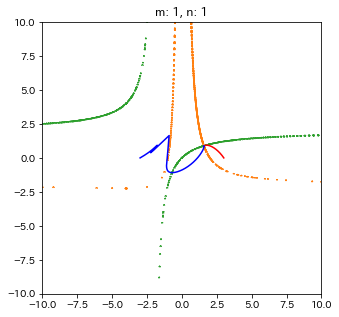

In [290]:
fig = plt.figure(figsize=(len(mus) * 1, len(mus) * 1))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(f"m: {m}, n: {n}")
#ax.streamplot(y, z, dV, dm)
ax.contour(y, z, np.isclose(dy, 0.0, atol=1e-3),
           linestyles=["dashed"], colors=[sns.color_palette()[1]])
ax.contour(y, z, np.isclose(dz, 0.0, atol=1e-3),
           linestyles=["dashed"], colors=[sns.color_palette()[2]])
ax.plot(trajectory1[:, 0], trajectory1[:, 1], color="red")
ax.plot(trajectory2[:, 0], trajectory2[:, 1], color="blue")

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

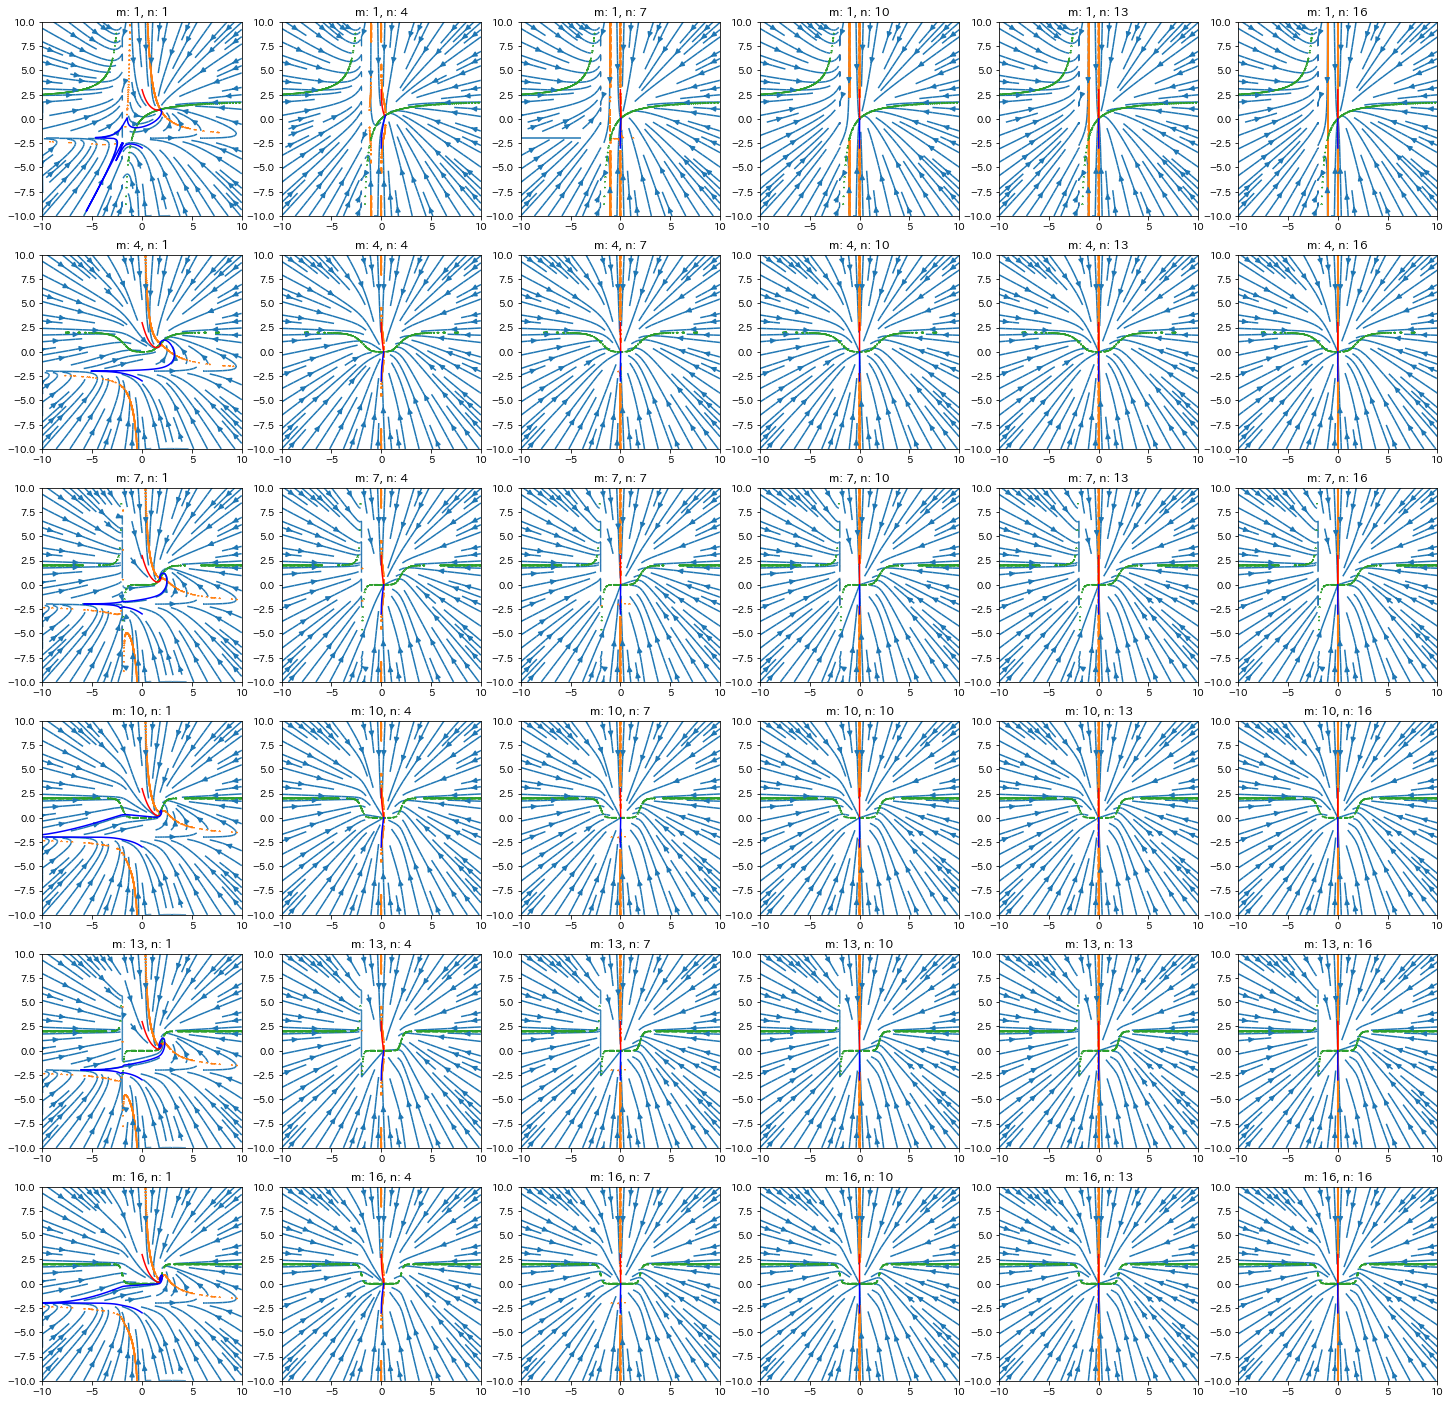

In [318]:
max_m = 16
step_m = 3
max_n = 16
step_n = 3

alpha_1 = 1
alpha_2 = 2
alpha_3 = 4
K_1 = 2
K_2 = 2
K_3 = 2

# Range of Phase space
max_y = 10
min_y = -10
y_width = 0.01
y = np.arange(min_y, max_y + y_width, y_width)
max_z = 10
min_z = -10
z_width = 0.01
z = np.arange(min_z, max_z + z_width, z_width)
y, z = np.meshgrid(y, z)

fig = plt.figure(figsize=((max_m // step_m) * 5, (max_n // step_n) * 5))


for m, n in itertools.product(
        range(1, max_m + 1, step_m), range(1, max_n + 1, step_n)):

    dy = alpha_1 * y ** m / (K_1 ** m + y ** m) + \
        alpha_3 / (K_3 ** n + z ** n) - y
    dz = alpha_2 * y ** m / (K_2 ** m + y ** m) - z

    def calculate_differential(y, z):
        dy = alpha_1 * y ** m / (K_1 ** m + y ** m) + \
            alpha_3 / (K_3 ** n + z ** n) - y
        dz = alpha_2 * y ** m / (K_2 ** m + y ** m) - z
        return dy, dz

    def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=100):
        ｔrajectory = np.array([[x_0, y_0]])
        x_i, y_i = x_0, y_0
        for _ in range(steps):
            dx, dy = differential(x_i, y_i)
            x_ip1 = x_i + delta * dx
            y_ip1 = y_i + delta * dy
            #ｔrajectory.append([x_ip1, y_ip1])
            ｔrajectory = np.append(
                ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
            x_i, y_i = x_ip1, y_ip1

            if (abs(x_i) > 1e4) | (abs(y_i) > 1e4):
                break
        return ｔrajectory

    trajectory1 = calculate_trajectory(0, 3,
                                       differential=calculate_differential,
                                       delta=0.01, steps=10000)
    trajectory2 = calculate_trajectory(0, -3,
                                       differential=calculate_differential,
                                       delta=0.01, steps=10000)

    ax = fig.add_subplot(max_m // step_m + 1, max_n // step_n + 1,
                         (max_n // step_n + 1) * ((m // step_m)) + (n // step_n) + 1)
    ax.set_title(f"m: {m}, n: {n}")
    ax.streamplot(y, z, dy, dz)
    ax.contour(y, z, np.isclose(dy, 0.0, atol=1e-3),
               linestyles=["dashed"], colors=[sns.color_palette()[1]])
    ax.contour(y, z, np.isclose(dz, 0.0, atol=1e-3),
               linestyles=["dashed"], colors=[sns.color_palette()[2]])
    ax.plot(trajectory1[:, 0], trajectory1[:, 1], color="red")
    ax.plot(trajectory2[:, 0], trajectory2[:, 1], color="blue")

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

In [315]:
max_m = 22
step_m = 3
max_n = 16
step_n = 3

for m, n in itertools.product(range(1, max_m + 1, step_m),range(1, max_n + 1, step_n)):
    print(m, n, (max_n // step_n + 1) * ((m // step_m)) + (n // step_n) + 1) 

1 1 1
1 4 2
1 7 3
1 10 4
1 13 5
1 16 6
4 1 7
4 4 8
4 7 9
4 10 10
4 13 11
4 16 12
7 1 13
7 4 14
7 7 15
7 10 16
7 13 17
7 16 18
10 1 19
10 4 20
10 7 21
10 10 22
10 13 23
10 16 24
13 1 25
13 4 26
13 7 27
13 10 28
13 13 29
13 16 30
16 1 31
16 4 32
16 7 33
16 10 34
16 13 35
16 16 36
19 1 37
19 4 38
19 7 39
19 10 40
19 13 41
19 16 42
22 1 43
22 4 44
22 7 45
22 10 46
22 13 47
22 16 48


## 3.5 フィッツヒュー-南雲方程式

In [328]:
I_ext = 0.0

a = 2.5
b = 2.0
c = 1.0
epsilon = 0.05


# Range of Phase space
max_v = 5
min_v = -1
v_width = 0.001
v = np.arange(min_v, max_v + v_width, v_width)
max_m = 5
min_m = -1
m_width = 0.001
m = np.arange(min_m, max_m + m_width, m_width)
v, m = np.meshgrid(v, m)


dv = (v * (a - v) * (v - 1) - m + I_ext) / epsilon
dm = b * v - c * m

(-1, 5)

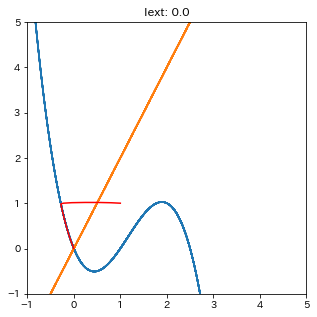

In [330]:
fig = plt.figure(figsize=(1 * 5, 1 * 5))


def calculate_differential(v, m):
    dv = (v * (a - v) * (v - 1) - m + I_ext) / epsilon
    dm = b * v - c * m
    return dv, dm


def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=1000):
    ｔrajectory = np.array([[x_0, y_0]])
    x_i, y_i = x_0, y_0
    for _ in range(steps):
        dx, dy = differential(x_i, y_i)
        x_ip1 = x_i + delta * dx
        y_ip1 = y_i + delta * dy
        #ｔrajectory.append([x_ip1, y_ip1])
        ｔrajectory = np.append(ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
        x_i, y_i = x_ip1, y_ip1

        if (abs(x_i) > 1e4) | (abs(y_i) > 1e4):
            break
    return ｔrajectory


v_0, m_0 = 1, 1
trajectory = calculate_trajectory(v_0, m_0,
                                  differential=calculate_differential,
                                  delta=0.01, steps=100000)


ax = fig.add_subplot(1, 1, 1)
ax.set_title(f"Iext: {I_ext}")
#ax.streamplot(v, m, dv, dm)
ax.contour(v, m, np.isclose(dv, 0.0, atol=1e-2),
           linestyles=["dashed"], colors=[sns.color_palette()[0]])
ax.contour(v, m, np.isclose(dm, 0.0, atol=1e-3),
           linestyles=["dashed"], colors=[sns.color_palette()[1]])
ax.plot(trajectory[:, 0], trajectory[:, 1], color="red")
ax.set_xlim(min_v, max_v)
ax.set_ylim(min_m, max_m)

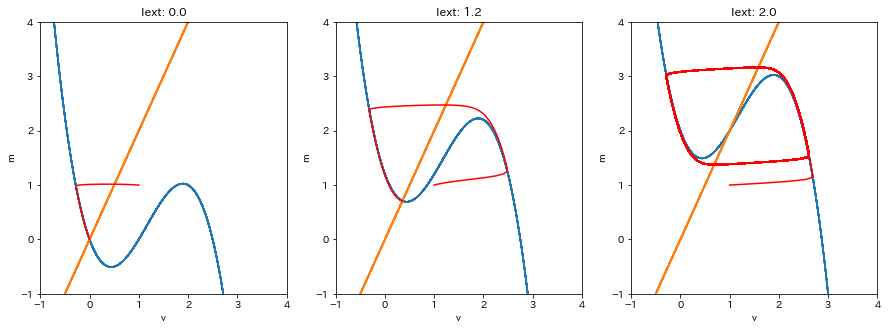

In [352]:
a = 2.5
b = 2.0
c = 1.0
epsilon = 0.05


# Range of Phase space
max_v = 4
min_v = -1
v_width = 0.001
v = np.arange(min_v, max_v + v_width, v_width)
max_m = 4
min_m = -1
m_width = 0.001
m = np.arange(min_m, max_m + m_width, m_width)
v, m = np.meshgrid(v, m)

trajectories = {}

fig = plt.figure(figsize=(3 * 5, 1 * 5))

for i, I_ext in enumerate([0.0, 1.2, 2.0]):

    dv = (v * (a - v) * (v - 1) - m + I_ext) / epsilon
    dm = b * v - c * m

    def calculate_differential(v, m):
        dv = (v * (a - v) * (v - 1) - m + I_ext) / epsilon
        dm = b * v - c * m
        return dv, dm

    def calculate_trajectory(x_0, y_0, differential, delta=0.1, steps=1000):
        ｔrajectory = np.array([[x_0, y_0]])
        x_i, y_i = x_0, y_0
        for _ in range(steps):
            dx, dy = differential(x_i, y_i)
            x_ip1 = x_i + delta * dx
            y_ip1 = y_i + delta * dy
            #ｔrajectory.append([x_ip1, y_ip1])
            ｔrajectory = np.append(
                ｔrajectory, np.array([[x_ip1, y_ip1]]), axis=0)
            x_i, y_i = x_ip1, y_ip1

            if (abs(x_i) > 1e4) | (abs(y_i) > 1e4):
                break
        return ｔrajectory

    v_0, m_0 = 1, 1
    ｔrajectory = calculate_trajectory(v_0, m_0,
                                      differential=calculate_differential,
                                      delta=0.01, steps=100000)

    trajectories[f"trajectory_Iext_{I_ext}"] = ｔrajectory

    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(f"Iext: {I_ext}")
    #ax.streamplot(v, m, dv, dm)
    ax.contour(v, m, np.isclose(dv, 0.0, atol=1e-2),
               linestyles=["dashed"], colors=[sns.color_palette()[0]])
    ax.contour(v, m, np.isclose(dm, 0.0, atol=1e-3),
               linestyles=["dashed"], colors=[sns.color_palette()[1]])
    ax.plot(trajectory[:, 0], trajectory[:, 1], color="red")
    ax.set_xlim(min_v, max_v)
    ax.set_ylim(min_m, max_m)
    ax.set_xlabel('v')
    ax.set_ylabel('m')

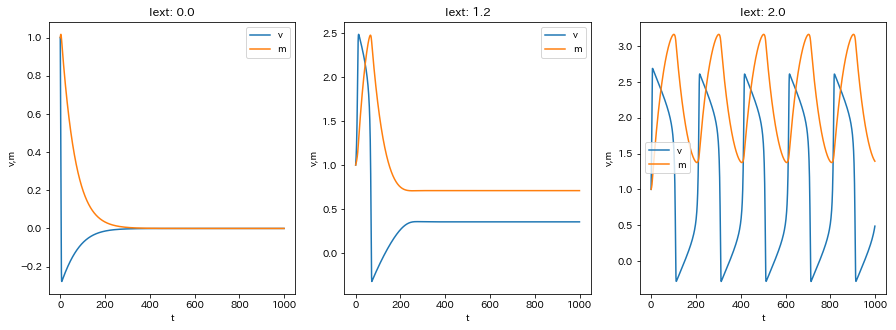

In [353]:
fig = plt.figure(figsize=(3 * 5, 1 * 5))
for i, (I_ext, ｔrajectory) in enumerate(trajectories.items()):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(f"Iext: {I_ext.split('_')[-1]}")
    ax.plot(np.arange(trajectory[0:1000, 0].shape[0]),
            trajectory[0:1000, 0], label='v')
    ax.plot(np.arange(trajectory[0:1000, 1].shape[0]),
            trajectory[0:1000, 1], label='m')
    ax.set_xlabel('t')
    ax.set_ylabel('v,m')
    ax.legend()

In [347]:
trajectories['trajectory_Iext_0.0']

array([[ 1.0000e+000,  1.0000e+000],
       [ 8.0000e-001,  1.0100e+000],
       [ 5.4360e-001,  1.0159e+000],
       ...,
       [-5.4347e-323,  1.2846e-322],
       [-5.4347e-323,  1.2846e-322],
       [-5.4347e-323,  1.2846e-322]])